In [38]:
from matplotlib import pyplot as plt
import pandas as pd
import os
import matplotlib as mpl
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')

### Make the comparison plot with data directly read from pickle (without defining the cases)

./data/Update_Lambda(c)_kp0.157_P0.008_Hs0.986_ustar0.030.csv
./data/Update_Lambda(c)_kp0.157_P0.01_Hs1.103_ustar0.038.csv
./data/Update_Lambda(c)_kp0.157_P0.016_Hs1.358_ustar0.058.csv
./data/Update_Lambda(c)_kp0.157_P0.02_Hs1.484_ustar0.069.csv
./data/Update_Lambda(c)_kp0.063_P0.05_Hs4.509_ustar0.161.csv
./data/Update_Lambda(c)_kp0.063_P0.07_Hs5.057_ustar0.202.csv


/tmp/ipykernel_164981/1975777471.py:77: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('./figures_revision/sigma_scaling.pdf', bbox_inches='tight', pad_inche=0.)


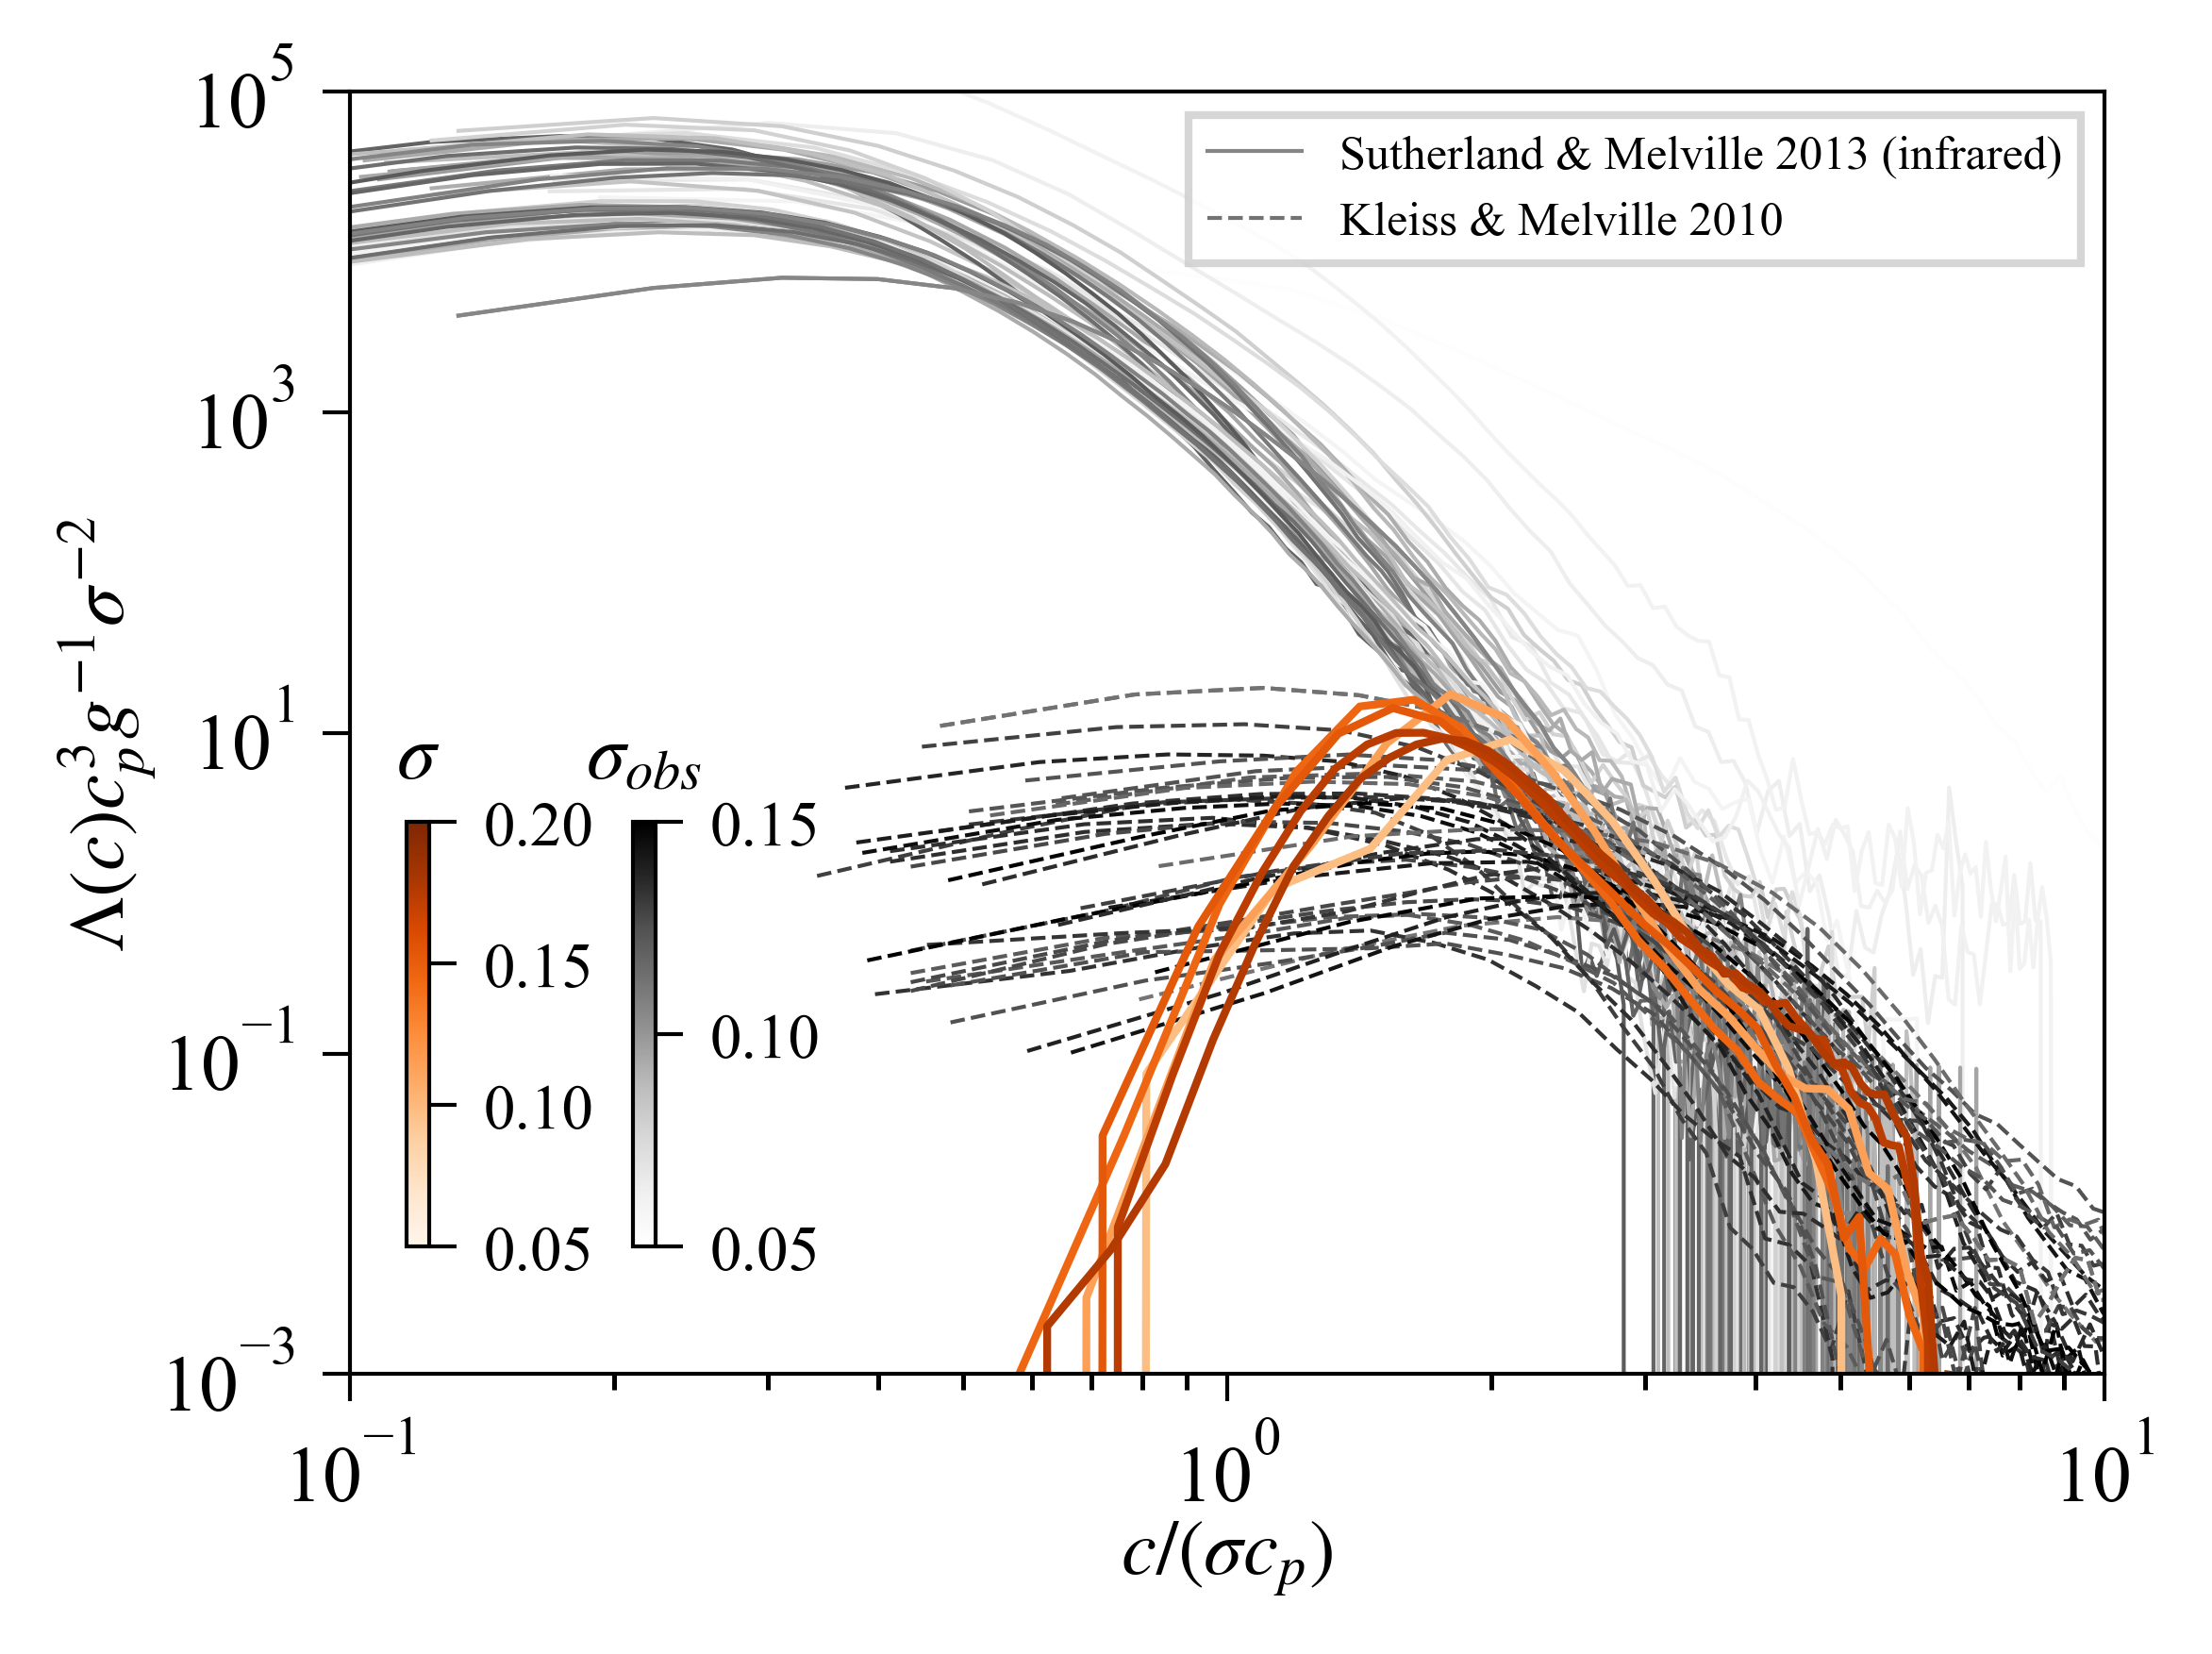

In [46]:
""" Normalized Lambda(x) distribution. Also include different lines for different angle spread. """
fig = plt.figure(figsize=[4,3]); ax = plt.gca()

""" Read from the s10 files """
for i in range(0,38):
    filename = 'data/s10_39/Newscaling_SolCal2013_%g.csv' %(39-i)
    if os.path.exists(filename):
        data = pd.read_csv(filename, delimiter = ',')
        cscale = (data['sigma'][0] - 0.05)/(0.15-0.05)
        plt.plot(data['hat{c}'], data['hat{Lambda(c)}'], linestyle='-', 
                 color=plt.get_cmap('Greys')(cscale), alpha=1, lw=0.5)            # The extra filter 
            
""" Read from the r09 files """
for i in range(0,25):
    filename = 'data/r09_25/Newscaling_r09_%g.csv' %(25-i)
    if os.path.exists(filename):
        data = pd.read_csv(filename, delimiter = ',')
        cscale = (data['sigma'][0] - 0.05)/(0.15-0.05)
        plt.plot(data['hat{c}'][:], data['hat{Lambda(c)}'][:], linestyle='-', 
                 color=plt.get_cmap('Greys')(cscale), alpha=1, lw=0.5)            # The extra filter 
        if i == 24:
            plt.plot(data['hat{c}'][:], data['hat{Lambda(c)}'][:], linestyle='-', 
                     color=plt.get_cmap('Greys')(cscale), alpha=1, lw=0.5, label='Sutherland & Melville 2013 (infrared)')            # The extra filter 

""" Read from the JK36 files """
for i in range(0,36):
    filename = 'data/JK_36/Newscaling_JK36_%g.csv' %(36-i)
    if os.path.exists(filename):
        data = pd.read_csv(filename, delimiter = ',')
        cscale = (data['sigma'][0] - 0.05)/(0.15-0.05)
        plt.plot(data['hat{c}'][:], data['hat{Lambda(c)}'][:], linestyle='--', 
                 color=plt.get_cmap('Greys')(cscale), alpha=1, lw=0.5)            # The extra filter 
        if i == 35:
            plt.plot(data['hat{c}'][:], data['hat{Lambda(c)}'][:], linestyle='--', 
                     color=plt.get_cmap('Greys')(cscale), alpha=1, lw=0.5, label='Kleiss & Melville 2010')            # The extra filter 


''' Read in the metadata '''
filename = './data/metadata_allcases.csv' 
if os.path.exists(filename):
    md = pd.read_csv(filename, delimiter = ',', header=0, float_precision='round_trip') 
for i in range(0, len(metadata)):
    if md.Npower[i] == 5 and md.P[i] != 0.005:
        cscale = (md.sigma[i] - 0.05)/(0.2-0.05)
        filename = "./data/Update_Lambda(c)_kp%.3f_P%g_Hs%.3f_ustar%.3f.csv" %(md.kp[i], md.P[i], md.Hskp[i]/md.kp[i], md.ustar_inferred[i])
        print(filename)
        data = pd.read_csv(filename, delimiter = ',', header=0)
        plt.plot(data['hatnew{c}'], data['hatnew{Lambda(c)}'], linestyle='-', 
                 color=plt.get_cmap('Oranges')(cscale), alpha=1, lw=1)            # The extra filter 
    


plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.1,10])
plt.ylim([10**(-3),10**5])
 
plt.xlabel(r'$c/(\sigma c_p)$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}\sigma^{-2}$', labelpad=0)
ax.set_yticks([10**(-3), 10**(-1),10**(1), 10**(3), 10**(5)])

plt.legend(fancybox=False, loc='upper right', fontsize=6)

ax2  = fig.add_axes([0.15,0.2,0.01,0.25])
norm = mpl.colors.Normalize(vmin=0.05, vmax=0.2)
cbar = mpl.colorbar.ColorbarBase(ax2, cmap=plt.get_cmap('Oranges'), norm=norm, orientation='vertical', ticks=(0.05,0.1,0.15,0.2))
cbar.ax.tick_params(labelsize=8)
cbar.ax.text(0.5, 1.15, r'$\sigma$', ha='center', va='center', transform=cbar.ax.transAxes)

ax3  = fig.add_axes([0.25,0.2,0.01,0.25])
norm = mpl.colors.Normalize(vmin=0.05, vmax=0.15)
cbar = mpl.colorbar.ColorbarBase(ax3, cmap=plt.get_cmap('Greys'), norm=norm, orientation='vertical', ticks=(0.05,0.1,0.15))
cbar.ax.tick_params(labelsize=8)
cbar.ax.text(0.5, 1.15, r'$\sigma_{obs}$', ha='center', va='center', transform=cbar.ax.transAxes)
fig.savefig('./figures_revision/sigma_scaling.pdf', bbox_inches='tight', pad_inche=0.)

In [ ]:
''' The code that wrote the csv files. '''
config.cp = (9.8/config.kp)**0.5
case.ustar = ((case.Hskp/config.kp*9.8)**0.5/1.58/config.cp**0.75)**4
file = open("./data/Update_Lambda(c)_kp%.3f_P%g_Hs%.3f_ustar%.3f.csv" %(config.kp, config.P, case.Hskp/config.kp, case.ustar), "w")
fieldnames = ['c (ms-1)', 'Lambda(c) (m-2s)', 'hat1{c}', 'hat1{Lambda(c)}', 'hat2{Lambda(c)}', 'hatnew{c}', 'hatnew{Lambda(c)}']
writer = csv.writer(file)
writer.writerow(fieldnames) 
# Wind-wave-mixed scaling for older plots
normx = (9.8*case.Hskp/config.kp)**0.5
normy1 = (9.8*case.Hskp/config.kp)**(14/6)/9.8/case.ustar**(5/3) 
normy2 = (config.cp)**(3.5)/9.8/case.ustar**(1/2) 
# Sigma based scaling for the plots
normx_new = (9.8/config.kp)**0.5*case.mu_plateau 
normy_new = 1/((9.8/config.kp)**1.5/9.8) * case.mu_plateau ** 2
print(normy_new)
bins_lambda_c = case.hist_ensem['hist_ensem'][0]/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
for c, lambda_c in zip(bins_plotting, bins_lambda_c):
    writer.writerow(['{:4f}'.format(c), '{:7f}'.format(lambda_c), '{:4f}'.format(c/normx), '{:7f}'.format(lambda_c*normy1), 
                     '{:7f}'.format(lambda_c*normy2), '{:4f}'.format(c/normx_new), '{:7f}'.format(lambda_c/normy_new)])     
file.close()  